In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection
from scipy import stats

ImportError: dlopen(/Users/piotrek/Projects/studia/fizyka/lib/pypy3.11/site-packages/scipy/spatial/_distance_pybind.pypy311-pp73-darwin.so, 0x0006): symbol not found in flat namespace '__ZNSt3__113__hash_memoryEPKvm'

In [ ]:
def trend_line(x, y, degree=1):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)
  y_trend = poly(x)
  return coeffs, y_trend

In [ ]:
frame = pd.read_csv("../data/elektromagnetyzm_203/data.csv")
temp = frame['temp']
semi = frame['semi']
cond = frame['cond']

In [ ]:
cond_trend = trend_line(cond, temp)[1]
semi_trend = trend_line(semi, temp, 5)[1]

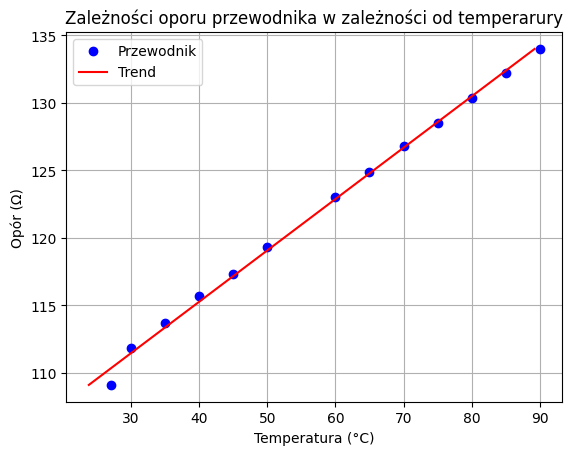

In [ ]:
plt.plot(temp, cond, "bo", label="Przewodnik")
plt.plot(cond_trend, cond, "r-", label="Trend")
plt.grid()
plt.title("Zależności oporu przewodnika w zależności od temperarury")
plt.ylabel("Opór (Ω)")
plt.xlabel("Temperatura (°C)")
plt.legend()
plt.show()
plt.close()

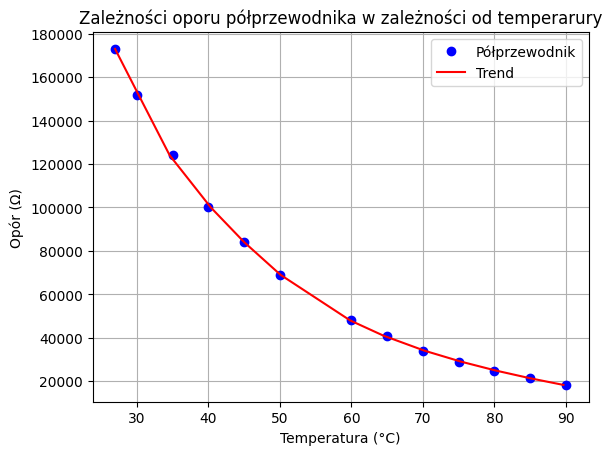

In [ ]:
plt.plot(temp, semi, "bo", label="Półprzewodnik")
plt.plot(semi_trend, semi, "r-", label="Trend")
plt.grid()
plt.title("Zależności oporu półprzewodnika w zależności od temperarury")
plt.ylabel("Opór (Ω)")
plt.xlabel("Temperatura (°C)")
plt.legend()
plt.show()
plt.close()

Współczynnik kierunkowy prostej regresji liniowej: -3881.8726951063027


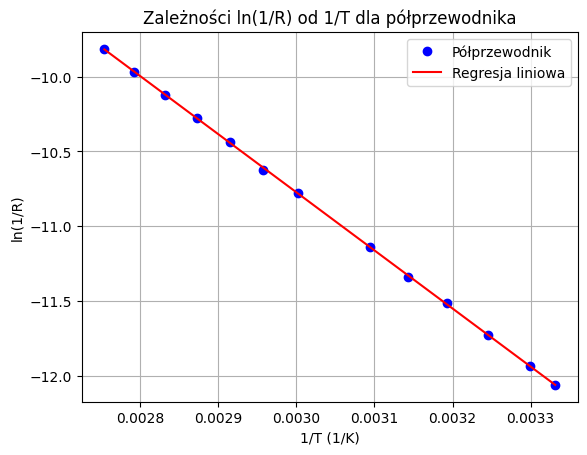

In [ ]:
temp_c = np.array([27, 30, 35, 40, 45, 50, 60, 65, 70, 75, 80, 85, 90])
r_semi = np.array([173000, 152000, 124000, 100000, 84000, 69000, 48000, 41000, 34000, 29000, 24900, 21300, 18300])

# Calculations
temp_k = temp_c + 273.15
x = 1 / temp_k
y = np.log(1 / r_semi)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, color='red', label='Dane pomiarowe')
plt.plot(x, line, color='blue', label=f'Regresja liniowa: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('$1/T$ [1/K]')
plt.ylabel('$\ln(1/R)$')
plt.title('Wykres zależności $\ln(1/R) = f(1/T)$ dla półprzewodnika')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

print("Slope (a):", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

